In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import os
import cv2
from glob import glob
import matplotlib.pyplot as plt

In [3]:
images_path='/content/drive/MyDrive/archive/Images/'
images=glob(images_path+'*.jpg')
print("Total number of Images: {}".format(len(images)))

Total number of Images: 8091


In [4]:
print("Image Format: ")
print(images[0:5])

Image Format: 
['/content/drive/MyDrive/archive/Images/3737492755_bcfb800ed1.jpg', '/content/drive/MyDrive/archive/Images/397547349_1fd14b95af.jpg', '/content/drive/MyDrive/archive/Images/408748500_e8dc8c0c4f.jpg', '/content/drive/MyDrive/archive/Images/391579205_c8373b5411.jpg', '/content/drive/MyDrive/archive/Images/405961988_fcfe97f31e.jpg']


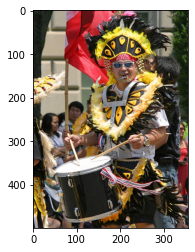

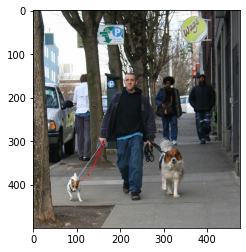

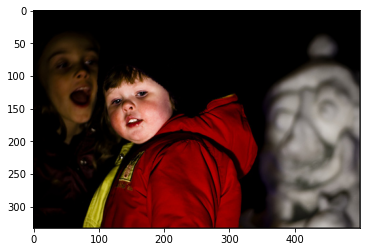

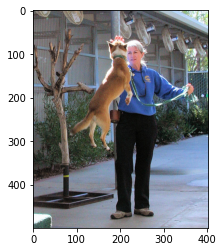

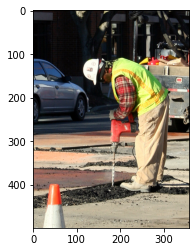

In [5]:
for i in range(0,5):

  plt.figure()
  sample_image=cv2.imread(images[i])
  sample_image=cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)
  plt.imshow(sample_image)

## Resnet 50 Transfer Learning

In [6]:
from tensorflow.keras.applications import ResNet50
resnet=ResNet50(include_top=True)

102981632/102967424 [==============================] - 3s 0us/step


In [7]:
print("The model architecture for feature extraction: ")
resnet.summary()

The model architecture for feature extraction: 
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________

In [8]:
from keras.models import Model


In [9]:
output_layer=resnet.layers[-2].output
input_layer=resnet.input
feature_extractor=Model(inputs=input_layer,outputs=output_layer)
print("New architecture for resnet: ")
feature_extractor.summary()

New architecture for resnet: 
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________________________________________________

In [10]:
images_features={}
c=0
for i in images:

  input_image=cv2.imread(i)
  input_image=cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB)
  input_image=cv2.resize(input_image,(224,224))
  input_image=input_image.reshape(1,224,224,3)
  
  features_image=feature_extractor.predict(input_image)
  features_image=features_image.reshape(2048,)

  image_name=i.split('/')[-1]
  images_features[image_name]=features_image

  c=c+1

  if c%100==0:

    print(c)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000


## Caption Preprocessing

In [11]:
captions_path= '/content/drive/MyDrive/archive/captions.txt'
captions_text= open(captions_path, mode='rb').read().decode('utf-8').split('\n')
captions_text

['image,caption',
 '1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg,A girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .',
 '1002674143_1b742ab4b8.jpg,A little girl covered in paint sits in front of a painted rainbow wi

In [12]:
captions_text[1]

'1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .'

In [13]:
captions_text[1].split(',')[0]

'1000268201_693b08cb0e.jpg'

In [14]:
captions_text[1].split(',')[-1]

'A child in a pink dress is climbing up a set of stairs in an entry way .'

In [15]:
images_captions={}

for i in captions_text:

  img_name=i.split(',')[0]
  img_caption=i.split(',')[-1]
  if img_name not in images_captions:

    images_captions[img_name]=[img_caption]

  else:

    images_captions[img_name].append(img_caption)

In [16]:
images_captions
del images_captions['image']

In [17]:
images_captions

{'1000268201_693b08cb0e.jpg': ['A child in a pink dress is climbing up a set of stairs in an entry way .',
  'A girl going into a wooden building .',
  'A little girl climbing into a wooden playhouse .',
  'A little girl climbing the stairs to her playhouse .',
  'A little girl in a pink dress going into a wooden cabin .'],
 '1001773457_577c3a7d70.jpg': ['A black dog and a spotted dog are fighting',
  'A black dog and a tri-colored dog playing with each other on the road .',
  'A black dog and a white dog with brown spots are staring at each other in the street .',
  'Two dogs of different breeds looking at each other on the road .',
  'Two dogs on pavement moving toward each other .'],
 '1002674143_1b742ab4b8.jpg': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A little girl is sitting in front of a large painted rainbow .',
  'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
  'T

In [18]:
def add_sequences(captions):

  modified_caption=captions.lower()
  modified_caption='startofseq'+' ' + modified_caption + ' '+ 'endofseq'
  return modified_caption

In [19]:
for key,value in images_captions.items():

  for caption_index in value:

    images_captions[key][value.index(caption_index)]=add_sequences(caption_index)

In [20]:
images_captions

{'1000268201_693b08cb0e.jpg': ['startofseq a child in a pink dress is climbing up a set of stairs in an entry way . endofseq',
  'startofseq a girl going into a wooden building . endofseq',
  'startofseq a little girl climbing into a wooden playhouse . endofseq',
  'startofseq a little girl climbing the stairs to her playhouse . endofseq',
  'startofseq a little girl in a pink dress going into a wooden cabin . endofseq'],
 '1001773457_577c3a7d70.jpg': ['startofseq a black dog and a spotted dog are fighting endofseq',
  'startofseq a black dog and a tri-colored dog playing with each other on the road . endofseq',
  'startofseq a black dog and a white dog with brown spots are staring at each other in the street . endofseq',
  'startofseq two dogs of different breeds looking at each other on the road . endofseq',
  'startofseq two dogs on pavement moving toward each other . endofseq'],
 '1002674143_1b742ab4b8.jpg': ['startofseq a little girl covered in paint sits in front of a painted rai

In [21]:
vocabulary={}
count_words=1
for key,value in images_captions.items():
  for caption_index in value:
    for word in caption_index.split():
      if word not in vocabulary:
        vocabulary[word]=count_words
        count_words=count_words+1

In [22]:
print("Total number of words in vocabulary: {}".format(len(vocabulary)))

Total number of words in vocabulary: 8912


In [23]:
vocabulary

{'startofseq': 1,
 'a': 2,
 'child': 3,
 'in': 4,
 'pink': 5,
 'dress': 6,
 'is': 7,
 'climbing': 8,
 'up': 9,
 'set': 10,
 'of': 11,
 'stairs': 12,
 'an': 13,
 'entry': 14,
 'way': 15,
 '.': 16,
 'endofseq': 17,
 'girl': 18,
 'going': 19,
 'into': 20,
 'wooden': 21,
 'building': 22,
 'little': 23,
 'playhouse': 24,
 'the': 25,
 'to': 26,
 'her': 27,
 'cabin': 28,
 'black': 29,
 'dog': 30,
 'and': 31,
 'spotted': 32,
 'are': 33,
 'fighting': 34,
 'tri-colored': 35,
 'playing': 36,
 'with': 37,
 'each': 38,
 'other': 39,
 'on': 40,
 'road': 41,
 'white': 42,
 'brown': 43,
 'spots': 44,
 'staring': 45,
 'at': 46,
 'street': 47,
 'two': 48,
 'dogs': 49,
 'different': 50,
 'breeds': 51,
 'looking': 52,
 'pavement': 53,
 'moving': 54,
 'toward': 55,
 'covered': 56,
 'paint': 57,
 'sits': 58,
 'front': 59,
 'painted': 60,
 'rainbow': 61,
 'hands': 62,
 'bowl': 63,
 'sitting': 64,
 'large': 65,
 'small': 66,
 'grass': 67,
 'plays': 68,
 'fingerpaints': 69,
 'canvas': 70,
 'it': 71,
 'there': 

In [24]:
for key,value in images_captions.items():
  for caption_index in value:
    token_list=[]
    for words in caption_index.split():
      token_list.append(vocabulary[words])

    images_captions[key][value.index(caption_index)]=token_list

In [25]:
images_captions

{'1000268201_693b08cb0e.jpg': [[1,
   2,
   3,
   4,
   2,
   5,
   6,
   7,
   8,
   9,
   2,
   10,
   11,
   12,
   4,
   13,
   14,
   15,
   16,
   17],
  [1, 2, 18, 19, 20, 2, 21, 22, 16, 17],
  [1, 2, 23, 18, 8, 20, 2, 21, 24, 16, 17],
  [1, 2, 23, 18, 8, 25, 12, 26, 27, 24, 16, 17],
  [1, 2, 23, 18, 4, 2, 5, 6, 19, 20, 2, 21, 28, 16, 17]],
 '1001773457_577c3a7d70.jpg': [[1, 2, 29, 30, 31, 2, 32, 30, 33, 34, 17],
  [1, 2, 29, 30, 31, 2, 35, 30, 36, 37, 38, 39, 40, 25, 41, 16, 17],
  [1,
   2,
   29,
   30,
   31,
   2,
   42,
   30,
   37,
   43,
   44,
   33,
   45,
   46,
   38,
   39,
   4,
   25,
   47,
   16,
   17],
  [1, 48, 49, 11, 50, 51, 52, 46, 38, 39, 40, 25, 41, 16, 17],
  [1, 48, 49, 40, 53, 54, 55, 38, 39, 16, 17]],
 '1002674143_1b742ab4b8.jpg': [[1,
   2,
   23,
   18,
   56,
   4,
   57,
   58,
   4,
   59,
   11,
   2,
   60,
   61,
   37,
   27,
   62,
   4,
   2,
   63,
   16,
   17],
  [1, 2, 23, 18, 7, 64, 4, 59, 11, 2, 65, 60, 61, 16, 17],
  [1,
   2,
   6

In [26]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [27]:
max_length=0
for key,value in images_captions.items():
  for caption_index in value:
    if(len(caption_index))>max_length:
      max_length=len(caption_index)

print("Maximum length of caption required: {}".format(max_length))

Maximum length of caption required: 36


In [28]:
vocab_size=len(vocabulary)
print(vocab_size)

8912


In [29]:
num_classes=vocab_size+1

In [30]:
import pickle
pickle_out = open("vocabulary.pickle","wb")
pickle.dump(vocabulary, pickle_out)
pickle_out.close()

In [51]:
pickle_out_features=open("images_features.pickle","wb")
pickle.dump(images_features,pickle_out_features)
pickle_out_features.close()

In [52]:
pickle_out_captions=open("images_captions.pickle","wb")
pickle.dump(images_captions,pickle_out_captions)
pickle_out_captions.close()

In [31]:
new_vocab={value:key for key,value in vocabulary.items()}

In [32]:
new_vocab

{1: 'startofseq',
 2: 'a',
 3: 'child',
 4: 'in',
 5: 'pink',
 6: 'dress',
 7: 'is',
 8: 'climbing',
 9: 'up',
 10: 'set',
 11: 'of',
 12: 'stairs',
 13: 'an',
 14: 'entry',
 15: 'way',
 16: '.',
 17: 'endofseq',
 18: 'girl',
 19: 'going',
 20: 'into',
 21: 'wooden',
 22: 'building',
 23: 'little',
 24: 'playhouse',
 25: 'the',
 26: 'to',
 27: 'her',
 28: 'cabin',
 29: 'black',
 30: 'dog',
 31: 'and',
 32: 'spotted',
 33: 'are',
 34: 'fighting',
 35: 'tri-colored',
 36: 'playing',
 37: 'with',
 38: 'each',
 39: 'other',
 40: 'on',
 41: 'road',
 42: 'white',
 43: 'brown',
 44: 'spots',
 45: 'staring',
 46: 'at',
 47: 'street',
 48: 'two',
 49: 'dogs',
 50: 'different',
 51: 'breeds',
 52: 'looking',
 53: 'pavement',
 54: 'moving',
 55: 'toward',
 56: 'covered',
 57: 'paint',
 58: 'sits',
 59: 'front',
 60: 'painted',
 61: 'rainbow',
 62: 'hands',
 63: 'bowl',
 64: 'sitting',
 65: 'large',
 66: 'small',
 67: 'grass',
 68: 'plays',
 69: 'fingerpaints',
 70: 'canvas',
 71: 'it',
 72: 'ther

# Validation

In [33]:
def preprocess_image(image_index):

  img_path = images[image_index]

  img=cv2.imread(img_path)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img=cv2.resize(img,(224,224))
  img=np.reshape(img,(1,224,224,3))

  return img

In [34]:
image_index=7863
test_img_features=preprocess_image(image_index)
img_features=feature_extractor.predict(test_img_features).reshape(1,2048)


In [35]:
img_features

array([[1.4716504 , 0.2499652 , 1.1843203 , ..., 0.01882427, 0.4864012 ,
        0.6509511 ]], dtype=float32)

In [36]:
def show_img(image_index):

  img_path = images[image_index]

  img=cv2.imread(img_path)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img)



In [38]:
from keras import models
model=models.load_model("model.h5")

In [39]:
caption_intermediate=['startofseq']

i=0
caption=''
while i<=25:

  i=i+1
  caption_input=[]

  for x in caption_intermediate:

    caption_input.append(vocabulary[x])

  caption_input=[caption_input]
  caption_input=pad_sequences(caption_input,padding='post',truncating='post',maxlen=max_length)

  result=model.predict([img_features,caption_input])
  result=np.argmax(result)

  intermediate_word=new_vocab[result]

  caption=caption + ' ' + intermediate_word

  if intermediate_word =='endofseq':

    break

  caption_intermediate.append(intermediate_word)


    





In [40]:
caption=caption.replace("endofseq",'')

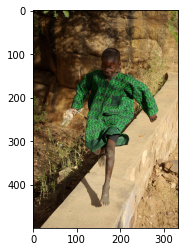

In [41]:
show_img(image_index)

In [42]:
print(caption)

 a young boy in a green shirt is running along a wall . 


# Validation (2)

In [43]:
test_image_path='/content/drive/MyDrive/archive/test_images/20.jpg'

In [44]:
def preprocess_image_test(path):

  img_path = path

  img=cv2.imread(img_path)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img=cv2.resize(img,(224,224))
  img=np.reshape(img,(1,224,224,3))

  return img

In [45]:
test_img_features=preprocess_image_test(test_image_path)
img_features=feature_extractor.predict(test_img_features).reshape(1,2048)

In [46]:
def show_test_img(path):

  img_path = path

  img=cv2.imread(img_path)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img)



In [47]:
caption_intermediate=['startofseq']

i=0
caption=''
while i<=25:

  i=i+1
  caption_input=[]

  for x in caption_intermediate:

    caption_input.append(vocabulary[x])

  caption_input=[caption_input]
  caption_input=pad_sequences(caption_input,padding='post',truncating='post',maxlen=max_length)

  result=model.predict([img_features,caption_input])
  result=np.argmax(result)

  intermediate_word=new_vocab[result]

  caption=caption + ' ' + intermediate_word

  if intermediate_word =='endofseq':

    break

  caption_intermediate.append(intermediate_word)


In [48]:
caption=caption.replace("endofseq",'')

In [49]:
print(caption)

 a boy in a blue shirt hits a tennis ball with a green tennis racket . 


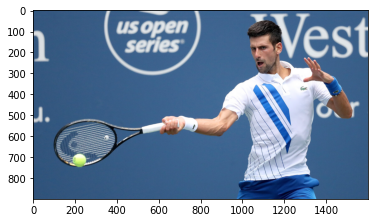

In [50]:
show_test_img(test_image_path)